In [1]:
import xarray as xr
import matplotlib.pyplot as plt
import numpy as np
import matplotlib.patches as patches

In [2]:
#select domains
inner = xr.open_dataset('/g/data/ng72/as9583/cylc-run/u-dr216/netcdf_new/surface_altitude/control_d0198_RAL3P2_albedo_bare_surface_altitude.nc')['surface_altitude']
outer = xr.open_dataset('/g/data/ng72/as9583/cylc-run/u-dr216/netcdf_new/surface_altitude/control_d1100_GAL9_surface_altitude.nc')['surface_altitude']

#respective inner/outer domain land values
landmask_o = xr.open_dataset('/g/data/ng72/as9583/cylc-run/u-dr216/netcdf_new/land_sea_mask/control_d1100_GAL9_land_sea_mask.nc')["land_binary_mask"].isel(time=0)
landmask_i = xr.open_dataset('/g/data/ng72/as9583/cylc-run/u-dr216/netcdf_new/land_sea_mask/control_d0198_RAL3P2_albedo_bare_land_sea_mask.nc')["land_binary_mask"].isel(time=0)

In [3]:
#mask to land only
inner = inner.where(landmask_i == 1)
outer = outer.where(landmask_o == 1)

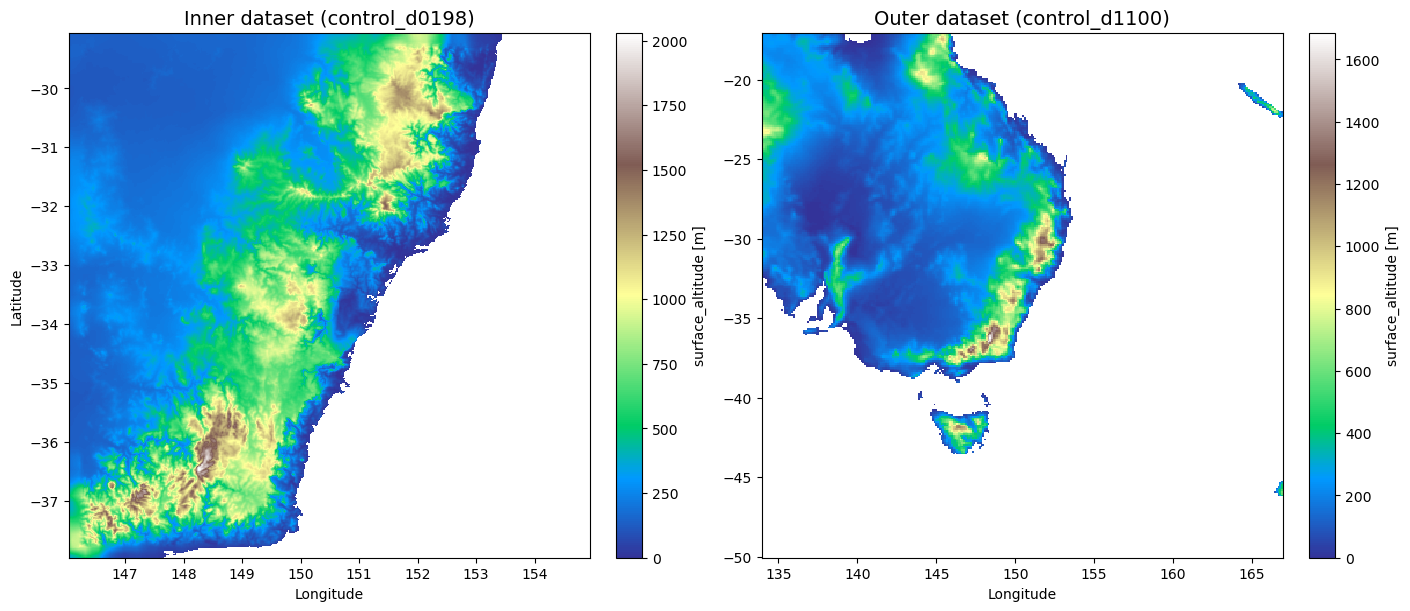

In [4]:
fig, axes = plt.subplots(1, 2, figsize=(14, 6), constrained_layout=True)

#inner
im0 = inner.plot(
    ax=axes[0],
    cmap="terrain",
    add_colorbar=True
)
axes[0].set_title("Inner dataset (control_d0198)", fontsize=14)
axes[0].set_xlabel("Longitude")
axes[0].set_ylabel("Latitude")

#outer
im1 = outer.plot(
    ax=axes[1],
    cmap="terrain",
    add_colorbar=True
)
axes[1].set_title("Outer dataset (control_d1100)", fontsize=14)
axes[1].set_xlabel("Longitude")
axes[1].set_ylabel("")

plt.show()

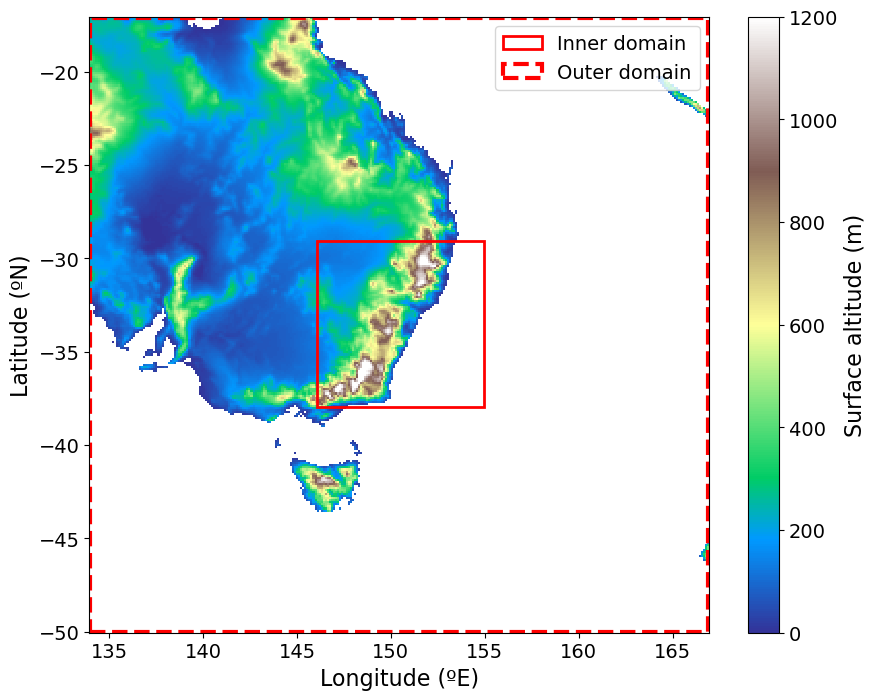

In [14]:
#lat/lon bounds inner
lat_min_inner = inner['latitude'].min().item()
lat_max_inner = inner['latitude'].max().item()
lon_min_inner = inner['longitude'].min().item()
lon_max_inner = inner['longitude'].max().item()

#lat/lon bounds outer
lat_min_outer = outer['latitude'].min().item()
lat_max_outer = outer['latitude'].max().item()
lon_min_outer = outer['longitude'].min().item()
lon_max_outer = outer['longitude'].max().item()

fig, ax = plt.subplots(figsize=(10, 8))

#plot outer
im = outer.plot(
    ax=ax,
    cmap="terrain",
    add_colorbar=False,
    vmax=1200   
)

#box for inner
rect_inner = patches.Rectangle(
    (lon_min_inner, lat_min_inner),   
    lon_max_inner - lon_min_inner,  #width
    lat_max_inner - lat_min_inner,   #height
    linewidth=2,
    edgecolor='red',
    facecolor='none',
    label='Inner domain'
)
ax.add_patch(rect_inner)

#dashed box for outer domain
rect_outer = patches.Rectangle(
    (lon_min_outer, lat_min_outer),
    lon_max_outer - lon_min_outer,
    lat_max_outer - lat_min_outer,
    linewidth=3,
    edgecolor='red',
    facecolor='none',
    linestyle='--',   
    label='Outer domain'
)
ax.add_patch(rect_outer)

ax.set_title("")
ax.set_xlabel("Longitude (ºE)", fontsize = 16)
ax.set_ylabel("Latitude (ºN)", fontsize = 16)
ax.tick_params(axis='both', labelsize = 14)

#legend
ax.legend(loc='upper right', fontsize = 14)
cbar = fig.colorbar(im, ax=ax, orientation="vertical")
cbar.set_label("Surface altitude (m)", fontsize=16)
cbar.ax.tick_params(labelsize=14)

# plt.savefig('/g/data/ng72/as9583/new_analysis/figures/domains.png', dpi = 300, bbox_inches = 'tight')
plt.show()
